In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages

import sympy as sp
from sympy import *
from mpmath import mp

x = Symbol("x")

# Opg. 4.1
# a)
expr = (1/x) - cos(x)/sin(x)

# Vi finder grænseværdierne
print("Grænseværdien for f,x->0+ er: {}".format(limit(expr, x, 0, "+")
))
print(r"Grænseværdien for f,x->pi- er: {}".format(limit(expr, x, pi, "-")
))

# c)
# Led efter løsninger i intervallet (pi,2pi)
# Af en eller anden årsag virkede "sp.pi" ikke, så jeg lod pi=3.14 i stedet for
sol = nsolve(expr, x, (3.14,2*3.14), solver="bisect")
print("\n Løsningen til f(c)=0 i (pi,2pi) er c={}".format(sol))


Grænseværdien for f,x->0+ er: 0
Grænseværdien for f,x->pi- er: oo

 Løsningen til f(c)=0 i (pi,2pi) er c=4.49340945790906


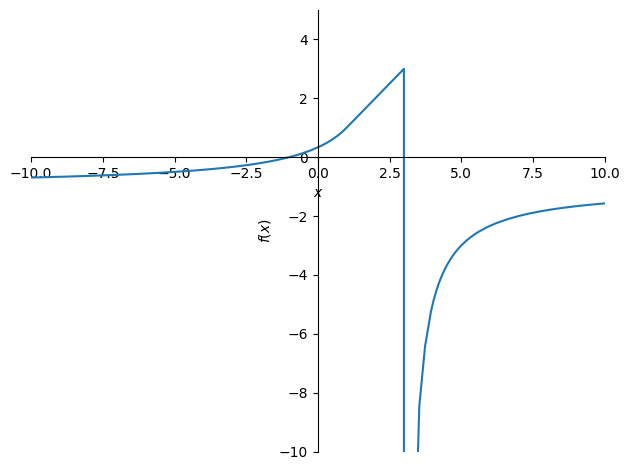

In [2]:
# Opgave 4.2
# a)
expr1 = (1-x**2) / ((x-1)*(x-3))
expr2 = x
func = sp.Piecewise((expr1, x<1), (expr2, x<=3), (expr1,x>3))
plot = sp.plot(func, xlim=[-10,10], ylim=[-10,5])


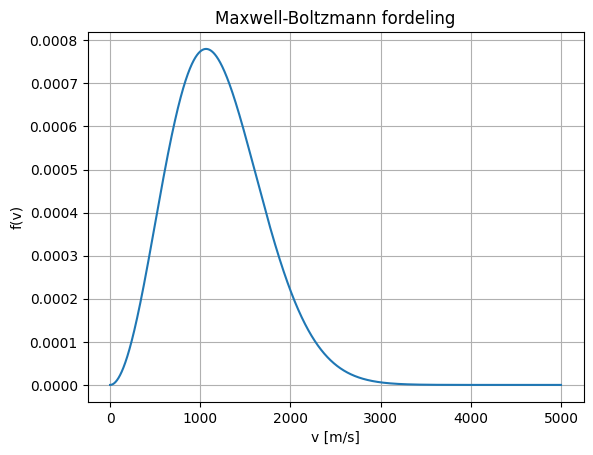

Mest sandsynlige fart ved T = 273K: 1064.44944998762 m/s


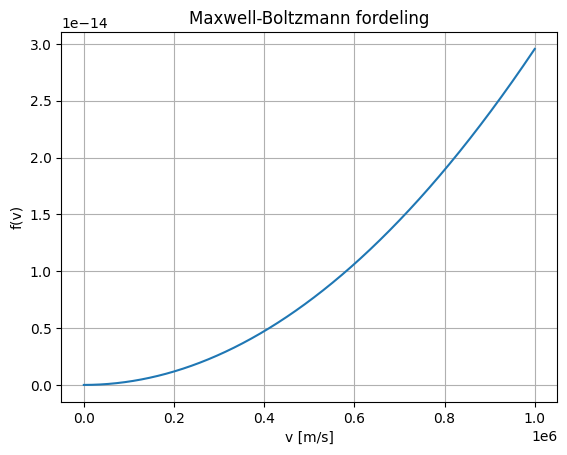

In [5]:
# Opgave 4.3
# a)

# Funktion til at tegne grafen
def MaxwellBoltzmannPlot(m, k, T, range):
    v = sp.Symbol("v")
    # Maxwell-Boltzmann fordeling
    f = 4 * sp.pi * ((m / (2 * sp.pi * k * T)) ** (3 / 2)) * v**2 * sp.exp((-m * v**2) / (2 * k * T))
    # Omdan til lambda funktion, for at tegne grafen med numpy (der var problemer med at tegne grafen med sympy)
    f_numeric = sp.lambdify(v, f, 'numpy')
    # Generer et array med værdier for v (hastigheder mellem 0 m/s og  5000 m/s er nok til at se grafens opførsel)
    v_values = np.linspace(range[0], range[1], range[1])

    # Beregn tilhørende f(v) værdier
    f_values = f_numeric(v_values)

    plt.plot(v_values, f_values)
    plt.xlabel('v [m/s]')
    plt.ylabel('f(v)')
    plt.title('Maxwell-Boltzmann fordeling')
    plt.grid(True)
    plt.show()
    return

# Variable
m = 6.65e-27
k = 1.38e-23
c = 3.00e8

# Første graf med T = 273 K.
MaxwellBoltzmannPlot(m, k, 273, (0, 5000))
print("Mest sandsynlige fart ved T = 273K: {} m/s".format(sqrt((2*k*273)/m)))

# Anden graf med T = (m*c**2)/k
MaxwellBoltzmannPlot(m, k, (m*c**2)/k, (0, int(1e6)))




In [4]:
import sympy as sp
from sympy import *
from IPython.display import display

# Opgave 4.3
# c)

a = sp.Symbol("a")
b = sp.Symbol("b")
m = sp.Symbol("m")
k = sp.Symbol("k")
t = sp.Symbol("t")
v = sp.Symbol("v")

print("Ubestemt integrale med a og b")
display(sp.integrate((a*v**3 * sp.exp(-b*v**2)), v))

expr = v*(4*sp.pi * (sp.sqrt((m/(2*sp.pi*k*t))**3)) * v**2 * sp.exp((-m*v**2)/(2*k*t)))

print("Ubestemt integrale skrevet ud")
display(sp.integrate(expr, v))

# Beregn middelfarten for T = 273K
m = 6.65e-27
k = 1.38e-23
t = 273

expr = v* 4*sp.pi * ((m/(2*sp.pi*k*t))**(3/2)) * v**2 * sp.exp((-m*v**2)/(2*k*t))

# Bestemt integrale for v*f(v) fra 0 til oo, rundet til 5 decimaler
mv = sp.integrate(expr, (v, 0, oo))

print("Middelfarten er: {}".format(round(mv, 5)))


Ubestemt integrale med a og b


Piecewise(((-a*b*v**2 - a)*exp(-b*v**2)/(2*b**2), Ne(b**2, 0)), (a*v**4/4, True))

Ubestemt integrale skrevet ud


Piecewise(((-2*sqrt(2)*sqrt(pi)*k**2*m*t**2*sqrt(m**3/(k**3*t**3)) - sqrt(2)*sqrt(pi)*k*m**2*t*v**2*sqrt(m**3/(k**3*t**3)))*exp(-m*v**2/(2*k*t))/(pi*m**3), Ne(pi*m**3, 0)), (sqrt(2)*v**4*sqrt(m**3/(k**3*t**3))/(4*sqrt(pi)), True))

Middelfarten er: 1201.10258
